(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D) 

2023-12-18 12:35:07.044683: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 12s 30ms/step - loss: 1.6936 - acc: 0.3721 - val_loss: 1.3323 - val_acc: 0.5140
Epoch 2/200
  4/313 [..............................] - ETA: 7s - loss: 1.2481 - acc: 0.5762

/home/subhangmokkarala/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 27ms/step - loss: 1.2128 - acc: 0.5637 - val_loss: 1.0750 - val_acc: 0.6208
Epoch 3/200
313/313 [==============================] - 8s 27ms/step - loss: 1.0163 - acc: 0.6425 - val_loss: 0.9106 - val_acc: 0.6829
Epoch 4/200
313/313 [==============================] - 8s 26ms/step - loss: 0.8969 - acc: 0.6850 - val_loss: 0.8268 - val_acc: 0.7067
Epoch 5/200
313/313 [==============================] - 8s 27ms/step - loss: 0.7934 - acc: 0.7217 - val_loss: 0.7574 - val_acc: 0.7312
Epoch 6/200
313/313 [==============================] - 8s 27ms/step - loss: 0.7160 - acc: 0.7484 - val_loss: 0.8135 - val_acc: 0.7166
Epoch 7/200
313/313 [==============================] - 8s 27ms/step - loss: 0.6446 - acc: 0.7721 - val_loss: 0.6931 - val_acc: 0.7598
Epoch 8/200
313/313 [==============================] - 8s 27ms/step - loss: 0.5953 - acc: 0.7901 - val_loss: 0.6723 - val_acc: 0.7685
Epoch 9/200
313/313 [==============================] - 8s 26ms/step - loss

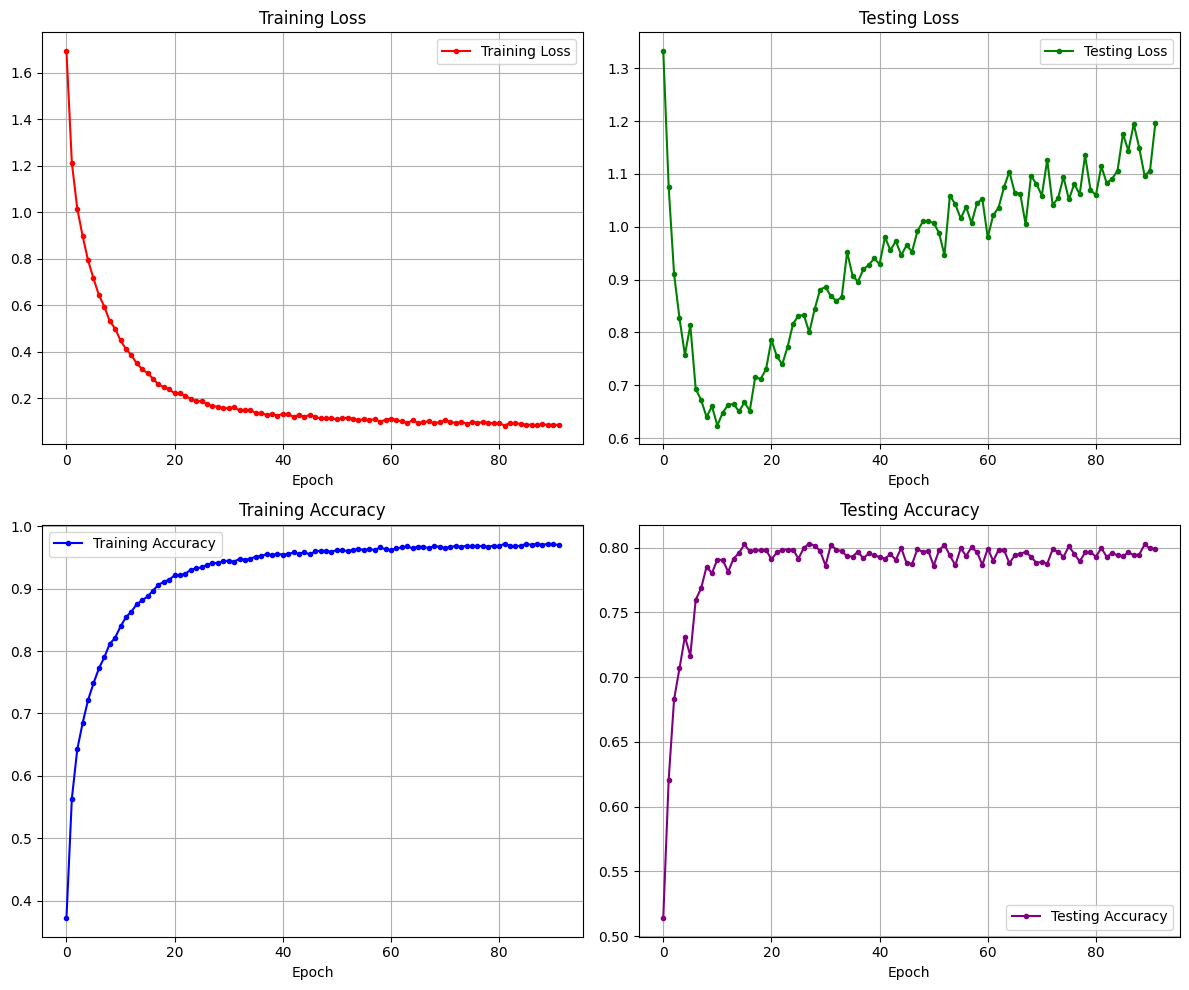

In [34]:
#cifar10

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 데이터 로드 -
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 확인
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape)   # (10000, 32, 32, 3) (10000, 1)
print(x_train[0])
print(y_train[0])

# 데이터 전처리
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# 모델 구성


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))





# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 확인
model.summary()

# model fitting
es = EarlyStopping(monitor='loss', patience=10, mode='auto')
modelpath = '../data/modelcheckpoint/k46_cifar10_{epoch:02d}-{val_loss:.4f}.hdf5'
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, mode='auto')
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[es, cp])

# 모델 평가
loss = model.evaluate(x_test, y_test)
print('loss :', loss[0])
print('acc :', loss[1])

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 3)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Testing Loss
plt.subplot(2, 2, 2)
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Testing Loss')
plt.xlabel('Epoch')
plt.legend()

# Testing Accuracy
plt.subplot(2, 2, 4)
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

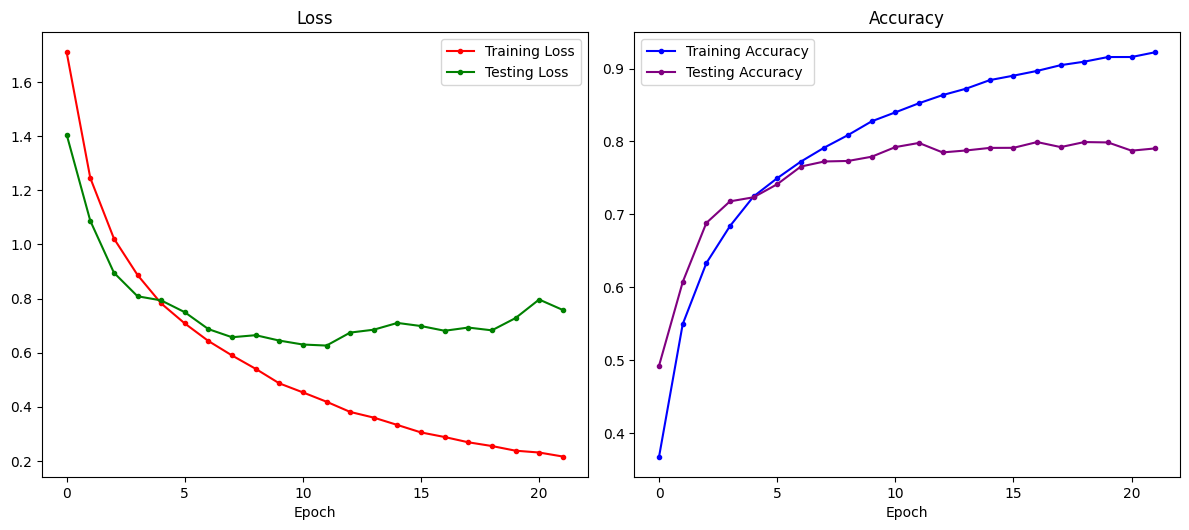

In [28]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 2)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Testing Loss
#plt.subplot(2, 2, 2)

# Testing Accuracy
#plt.subplot(2, 2, 4)


plt.tight_layout()
plt.show()

In [29]:
#save model
model.save('cifar10.h5')

In [30]:
#import model and predict
from tensorflow.keras.models import load_model
model = load_model('cifar10.h5')

y_pred = model.predict(x_test)
print(y_pred)
print(y_pred.shape) #(10000, 10)

print(np.argmax(y_pred, axis=1))
print(y_test)


313/313 [==============================] - 1s 4ms/step
[[1.8079228e-10 6.4586274e-08 2.5723693e-08 ... 1.4167406e-07
  7.4953547e-08 6.2835985e-09]
 [3.1054915e-06 8.7180937e-04 2.5134187e-14 ... 2.8749389e-15
  9.9912411e-01 9.8669670e-07]
 [2.2698884e-04 1.1078658e-03 1.3191503e-06 ... 1.2013642e-07
  9.9854004e-01 6.1201681e-05]
 ...
 [5.6558837e-13 3.6407999e-10 1.9327094e-04 ... 3.4605338e-05
  4.4881158e-08 1.1883128e-10]
 [5.5265398e-04 9.9938190e-01 8.4180704e-07 ... 1.0624782e-07
  5.8543710e-06 5.6769550e-05]
 [8.1671849e-15 4.0933746e-16 2.7177169e-11 ... 9.9999988e-01
  1.1561292e-13 4.0638756e-16]]
(10000, 10)
[3 8 8 ... 5 1 7]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


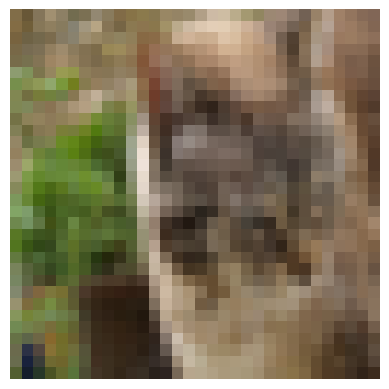

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
[[2.2736272e-07 2.5763228e-07 3.3814993e-03 9.7188908e-01 1.0546425e-02
  8.8265873e-03 4.9112532e-03 3.3624054e-04 3.3412542e-07 1.0806333e-04]]
cat


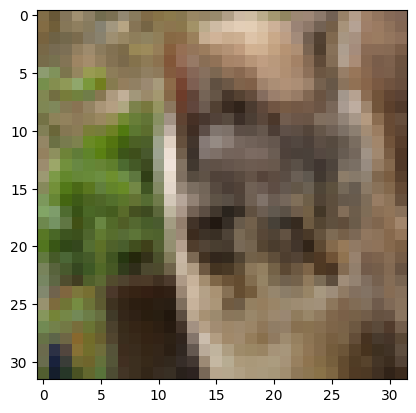

In [33]:
import matplotlib.pyplot as plt
#load a random image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
#load random image from dataset
# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Choose a random index
random_index = np.random.randint(0, len(x_train))

# Get the random image
random_image = x_train[random_index]

# Display the image
plt.imshow(random_image)
plt.axis('off')
plt.figure(figsize=(5, 5))
plt.show()

img = random_image
#img = load_img(r'download (2).jpeg', target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255.

result = model.predict(img)
print(result)

#assign labels so we can print the result
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[np.argmax(result)])
#shown the image with matplotlib
plt.imshow(img.reshape(32,32,3))
plt.show()




313/313 [==============================] - 1s 4ms/step
[[781  12  76  21  17   6   6  15  51  15]
 [  8 892   4  11   3   4   9   3  17  49]
 [ 28   1 708  81  63  27  54  25  11   2]
 [ 11   1  50 696  60  73  61  41   4   3]
 [  8   1  44  71 775  16  39  44   2   0]
 [  7   1  35 260  36 572  23  61   4   1]
 [  2   1  29  52  32   7 867   6   3   1]
 [ 11   2  18  38  41  25   4 855   2   4]
 [ 37  17  13  19   2   2   8   6 887   9]
 [ 25  64   6  25   5   2   6  15  20 832]]


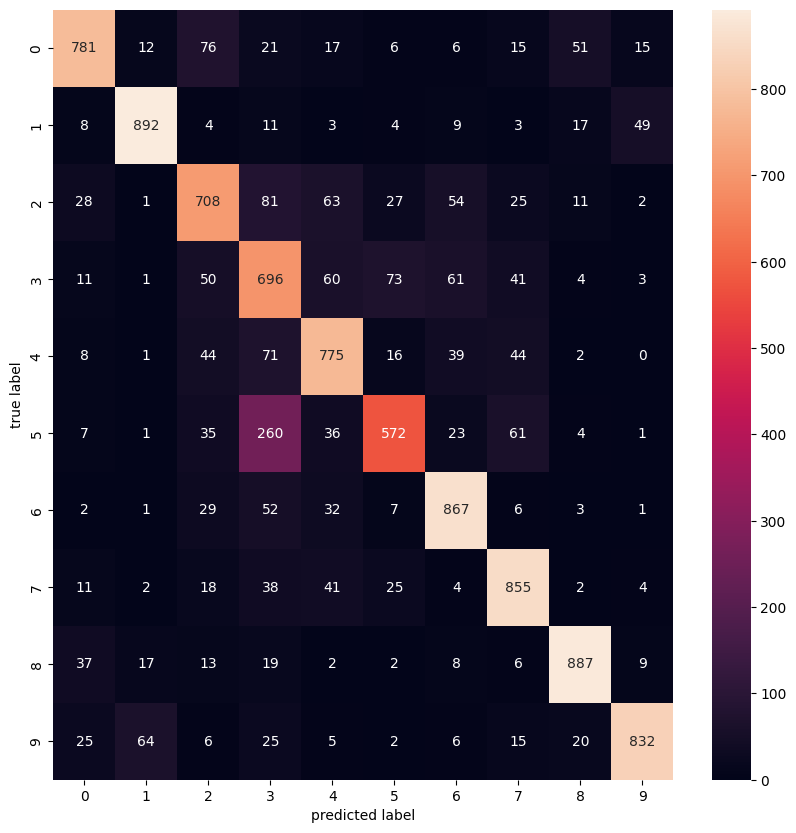

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.90      0.89      0.90      1000
           2       0.72      0.71      0.71      1000
           3       0.55      0.70      0.61      1000
           4       0.75      0.78      0.76      1000
           5       0.78      0.57      0.66      1000
           6       0.81      0.87      0.83      1000
           7       0.80      0.85      0.83      1000
           8       0.89      0.89      0.89      1000
           9       0.91      0.83      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [32]:
#performance metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = y_test.reshape(-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

print(classification_report(y_test, y_pred))